# Capstone Project 1: Data Story
## Federico Di Martino

Performing exploratory data analysis on bank customer churn data.

Answering the following questions:
1. Ask the following questions and look for the answers using code and plots:
    1. Can you count something interesting?
    2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
    3. Can you make a bar plot or a histogram?
    4. Can you compare two related quantities?
    5. Can you make a scatterplot?
    6. Can you make a time-series plot?

2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

3. Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?



### Preliminary actions

In [1]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import data
churn_data = pd.read_csv("Churn_Modelling.csv", index_col = 0)

## Print head to show structure of data
print(churn_data.head())

           CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1    

### Part 1.
#### A. Can you count something interesting?

Counting total number of customers which have churned out ('Exited'). Also calculating what percentage of customers churned out.

In [2]:
exited_sum = sum(churn_data['Exited'])
#print(exited_sum)
print("The total number of customers which churned out was {}".format(exited_sum) )
print("The percentage of customers which churned out was {}%".format( (exited_sum/( len(churn_data['Exited']))*100  ) ) )

The total number of customers which churned out was 2037
The percentage of customers which churned out was 20.369999999999997%


#### B. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)
Looking to see if there trends with how variables relate to each other through plots.

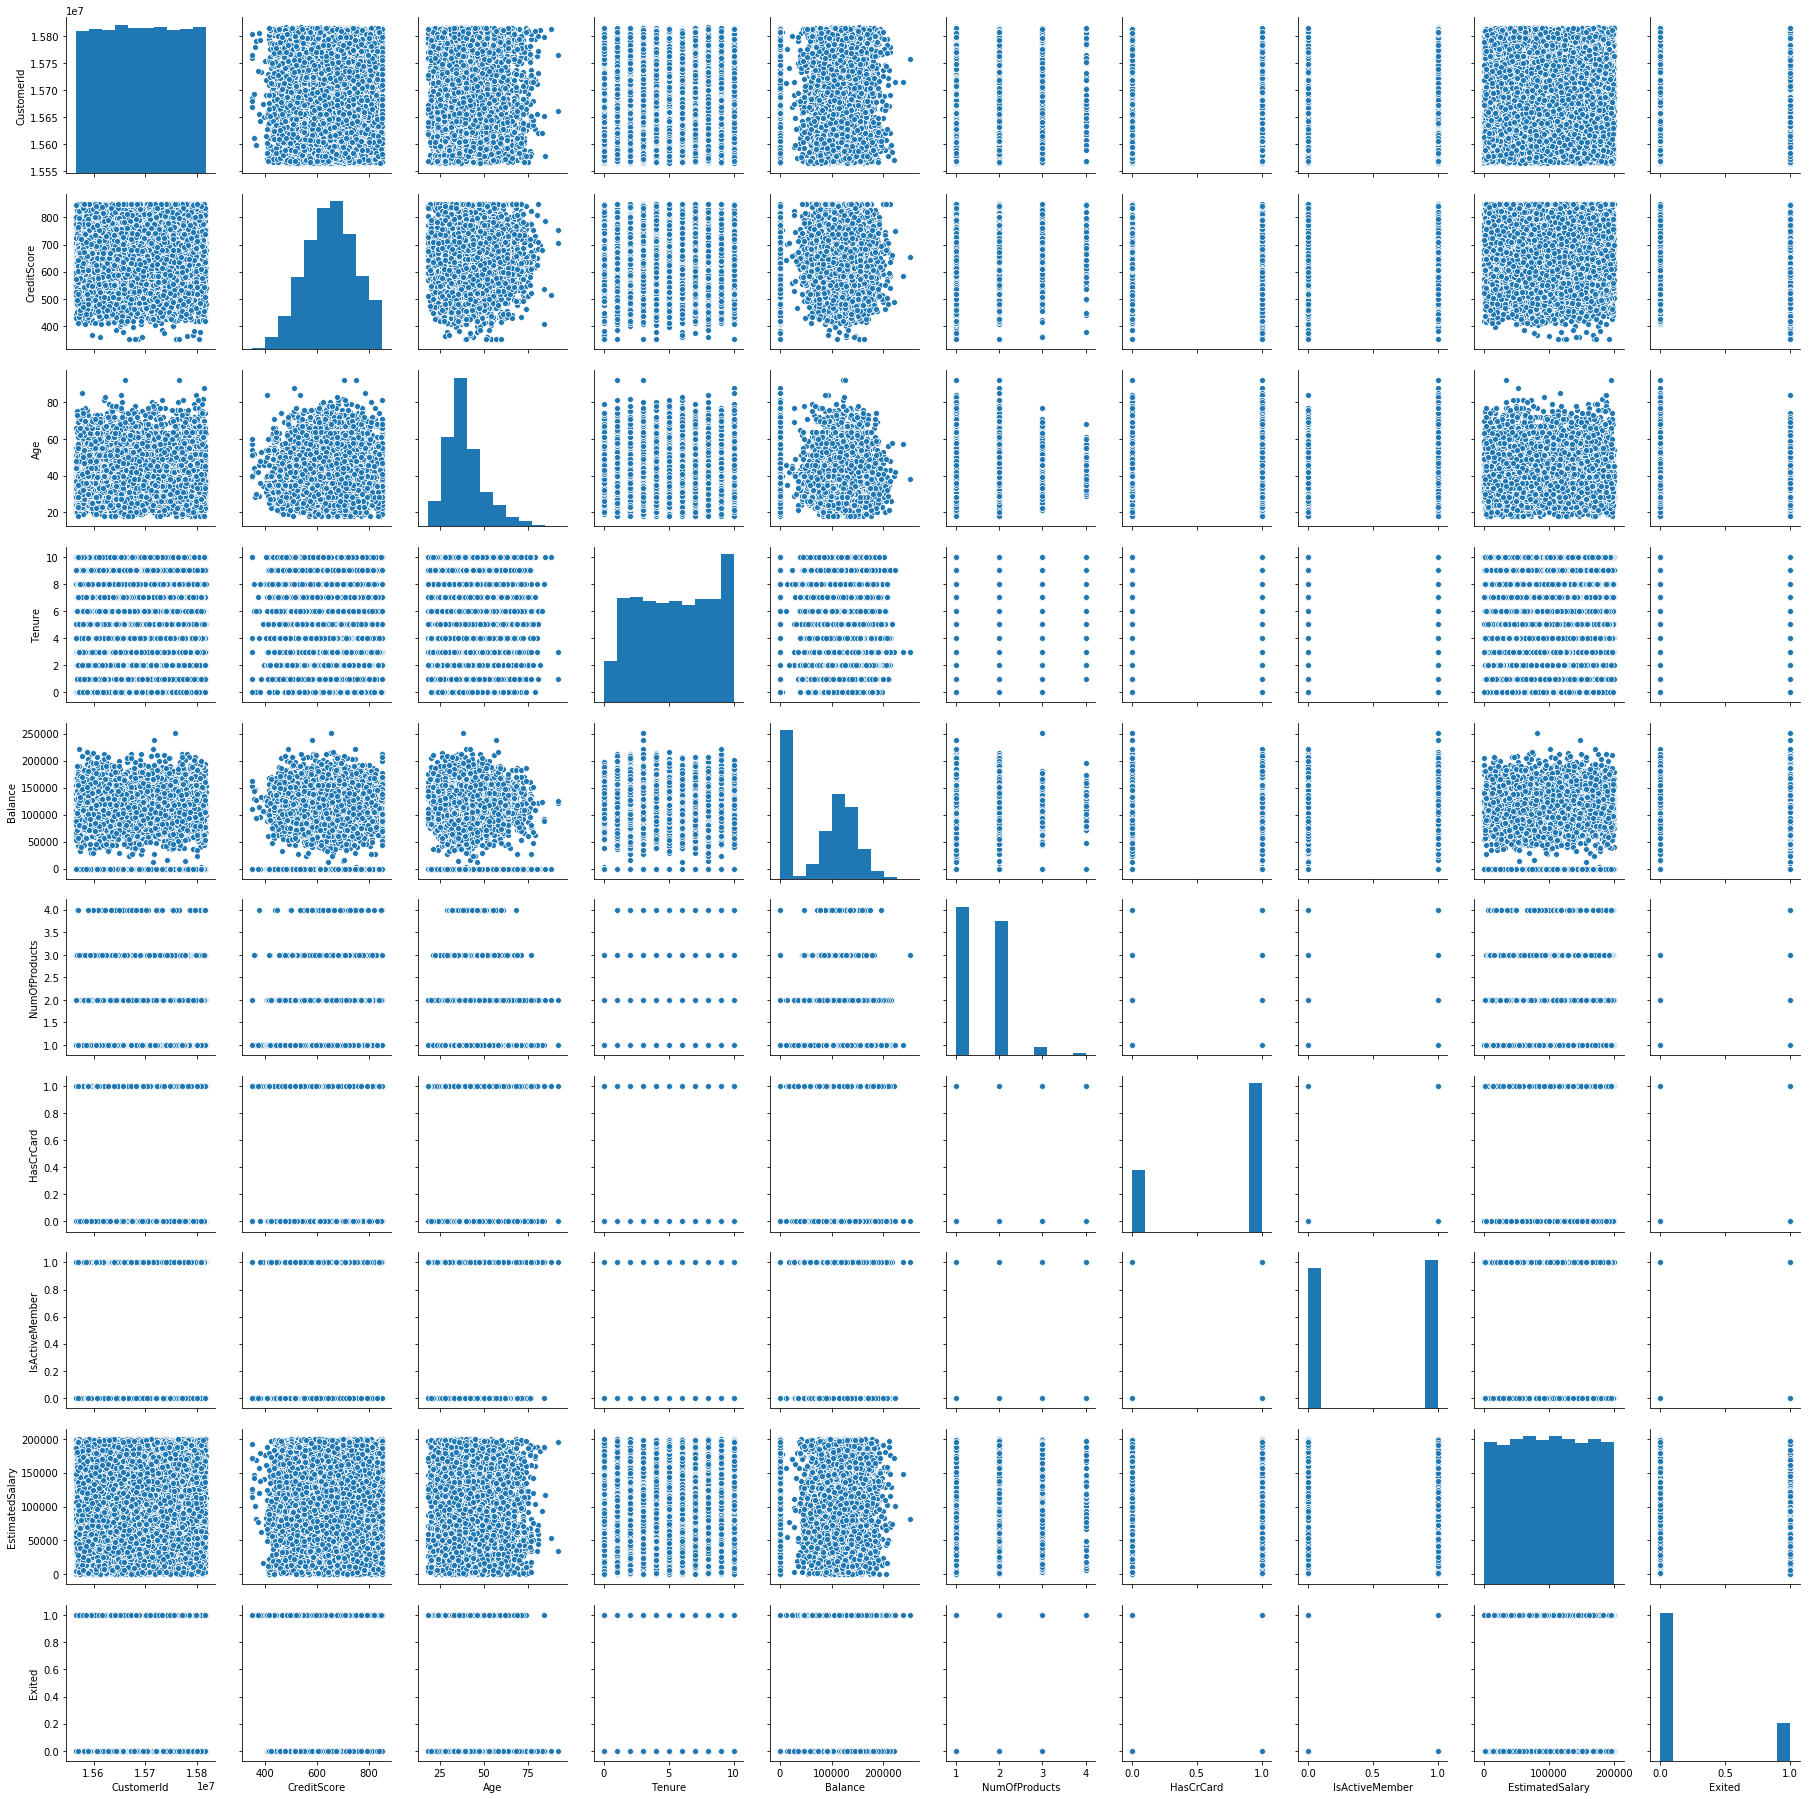

In [3]:
sns.pairplot(churn_data)
plt.show()

#### C. Can you make a bar plot or a histogram?
Making a bar plot to show relative geographical origin distribution of customers.

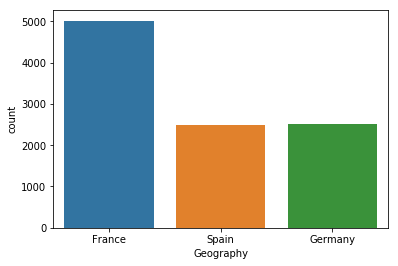

In [4]:
sns.countplot(data = churn_data, x = 'Geography')

#### D. Can you compare two related quantities? and E. Can you make a scatterplot?

Assuming Balance and Estimated Salary are related and comparing them using scatterplot.

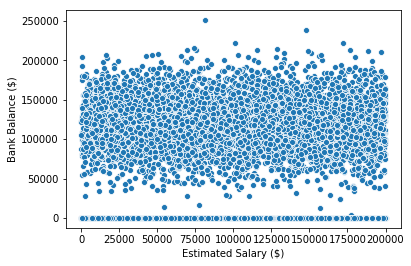

In [5]:
plot_d = sns.scatterplot(data = churn_data, x = 'EstimatedSalary', y = 'Balance')
plot_d.set(xlabel='Estimated Salary ($)', ylabel='Bank Balance ($)')
plt.show()

Although intuitively Balance and Salary should show some correlation, they do not appear to.

#### F. Can you make a time-series plot?
No. The data is does not have time as a variable.

### Part 2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?


#### Looking for correlations.
First of all, create a correlation plot for every variable using seaborn to get a broad overview.

In [6]:
## To work, all values need to be numeric
# churn_data.fillna(value=np.nan, inplace=True)
## reshape data so that geography column becomes three binary columns
heatmap_data = churn_data
heatmap_data['IsFrance'] = 0
heatmap_data['IsSpain'] = 0
heatmap_data['IsGermany'] = 0

heatmap_data.loc[heatmap_data['Geography'] == 'France','IsFrance'] = 1
heatmap_data.loc[heatmap_data['Geography'] == 'Spain','IsSpain'] = 1
heatmap_data.loc[heatmap_data['Geography'] == 'Germany','IsGermany'] = 1

heatmap_data['IsFrance'] = pd.to_numeric(heatmap_data['IsFrance'])
heatmap_data['IsSpain'] = pd.to_numeric(heatmap_data['IsSpain'])
heatmap_data['IsGermany'] = pd.to_numeric(heatmap_data['IsGermany'])

## Change gender column such that female -> 1, male -> 0
heatmap_data.loc[heatmap_data['Gender'] == 'Female','Gender'] = 1
heatmap_data.loc[heatmap_data['Gender'] == 'Male','Gender'] = 0
heatmap_data["Gender"] = pd.to_numeric(heatmap_data["Gender"])
#print(churn_data.head())


# Drop columns not be used
heatmap_data = heatmap_data.drop(['CustomerId', 'Surname', 'Geography'], axis = 'columns')

#print(heatmap_data.head())

#sns.heatmap(heatmap_data)
#plt.show()


# Calculate correlations
corr = heatmap_data.corr()

# Visualise correlation matrix
corr.style.background_gradient(cmap='coolwarm', axis = None).set_precision(2)

#corr.style.background_gradient(cmap='coolwarm', axis=None)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsFrance,IsSpain,IsGermany
CreditScore,1,0.0029,-0.004,0.00084,0.0063,0.012,-0.0055,0.026,-0.0014,-0.027,-0.0089,0.0048,0.0055
Gender,0.0029,1,0.028,-0.015,-0.012,0.022,-0.0058,-0.023,0.0081,0.11,-0.0068,-0.017,0.025
Age,-0.004,0.028,1,-0.01,0.028,-0.031,-0.012,0.085,-0.0072,0.29,-0.039,-0.0017,0.047
Tenure,0.00084,-0.015,-0.01,1,-0.012,0.013,0.023,-0.028,0.0078,-0.014,-0.0028,0.0039,-0.00057
Balance,0.0063,-0.012,0.028,-0.012,1,-0.3,-0.015,-0.01,0.013,0.12,-0.23,-0.13,0.4
NumOfProducts,0.012,0.022,-0.031,0.013,-0.3,1,0.0032,0.0096,0.014,-0.048,0.0012,0.009,-0.01
HasCrCard,-0.0055,-0.0058,-0.012,0.023,-0.015,0.0032,1,-0.012,-0.0099,-0.0071,0.0025,-0.013,0.011
IsActiveMember,0.026,-0.023,0.085,-0.028,-0.01,0.0096,-0.012,1,-0.011,-0.16,0.0033,0.017,-0.02
EstimatedSalary,-0.0014,0.0081,-0.0072,0.0078,0.013,0.014,-0.0099,-0.011,1,0.012,-0.0033,-0.0065,0.01
Exited,-0.027,0.11,0.29,-0.014,0.12,-0.048,-0.0071,-0.16,0.012,1,-0.1,-0.053,0.17


At first glance there aren't many strong correlations. The most important row to observe is how Exited correlates with the others, as that is what we want to be able to later predict. An important relationship to examine further is that of Exited (churn) with Age.

Another thing to investigate is how Balance and Estimated Salary are almost entirely uncorrelated! This seem very unintuitive and merits a further in depth look, although it may be tangential to the main objective of predicting churn.

### Part 3. Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

I think the narrative that emerges here is one of lack of clarity. On first inspection, whether a customer churns out is weakly correlated to anything else. I think a compelling story can be made out of the need to dig deeper. It would have been interesting to build time series data, had date/time data been available.
